# Estadística Inferencial con Pingouin

Este tutorial es una adaptación al español de los materiales del curso [Quantitative Neuroscience](http://www.compneurosci.com/NSCI801.html) desarrollado por Gunnar Blohm y Joe Nashed en la [Universidad de Queens](https://www.queensu.ca/). 


Para este tutorial es necesario instalar el paquete de estadística `Pingouin`:

In [ ]:
#!pip install pingouin

## ¿Qué es la estadística inferencial?

- Permite **obtener información de características de una población a partir de muestras**.
- Muestra debe ser lo suficientemente grande y representativa.

- Por población nos referimos a la **población de valores un atributo** (p.e. población de tallas, población de pesos, población de coeficiente intelectual, etc.)
- En investigaciones psicológicas con seres humanos, usualmente **un individuo de una población alberga múltiples atributos de interés**.
- Población de valores de un atributo ≠ Población de personas.

## Prueba de hipótesis

Podemos dividir el proceso de prueba de hipótesis en varios pasos:

1. Formular una hipótesis que encarne nuestra predicción (antes de ver los datos)
2. Especificar hipótesis nulas y alternas


3. Recopilar algunos datos relevantes para la hipótesis.
4. Ajustar un modelo a los datos que representan la hipótesis alternativa y calcular una estadística de prueba
5. Calcular la probabilidad del valor observado de ese estadístico asumiendo que la hipótesis nula es verdadera
6. Evaluar la "significación estadística" del resultado

## Comparación de grupos

Cuando queremos comparar grupos o condiciones experimentales recurrimos a métodos de comparación de distribuciones. Estos pueden estar basados en las medias (pruebas paramétricas) o en el orden de los datos (pruebas no paramétricas).

### Análisis de normalidad

Un procedimiento común para elegir entre ambas consiste en verificar la normalidad de las distribuciones a analizar. 

Para ello existen métodos gráficos e inferenciales.

En Python podemos generar la gráfica de probabilidad normal con la función `qqplot` disponible en el paquete `pingouin`:

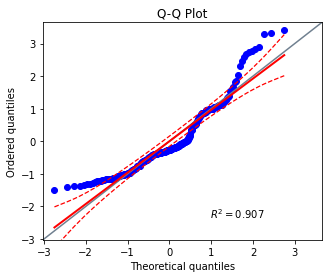

In [1]:
import pingouin as pg
import pandas as pd

df_subsdis=pd.read_csv('https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/depression-data-subsdis.csv')
pg.qqplot(df_subsdis['schizophrenia'], dist='norm');

En este gráfico se aprecia que la línea azul que representa a los datos presenta curvaturas. Esto sugiere una desviación respecto a la distribución normal. 

Las **pruebas inferenciales** específicas de normalidad también están disponibles en todos los programas estadísticos. Los dos más comunes son la prueba de Shapiro-Wilks y una modificación de la prueba de Kolmogorov-Smirnov. Cada uno **calcula el nivel de significancia para las diferencias en relación a una distribución normal**. 

En nuestro ejemplo, veamos a continuación el resultado de una prueba de Shapiro-Wilks:

In [3]:
pg.normality(df_subsdis['schizophrenia'],method='shapiro')

,W,pval,normal
schizophrenia,0.90627,7.514724e-11,False


### Análisis de heterocedasticidad

En el caso de las pruebas paramétricas, también suele interesarnos si las varianzas entre las distribuciones a analizar son homogéneas o no. 

Para este procedimiento, también podemos aplicar métodos gráficos e inferenciales.

Veámoslo en nuestro ejemplo:

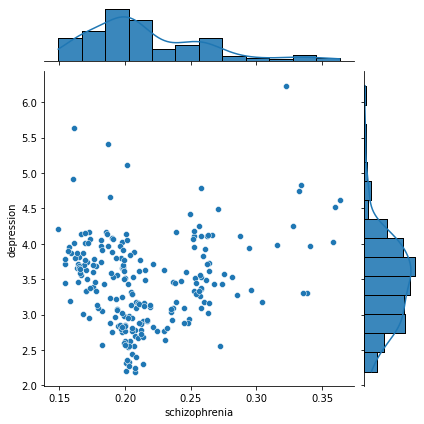

In [4]:
import seaborn as sns
ax = sns.jointplot(x='schizophrenia',y='depression',data=df_subsdis);
ax.plot_marginals(sns.histplot, kde=True);

Podemos apreciar que para los diferentes valores de la variable `depression` existen diferentes patrones de dispersion para la variable `schizophrenia`. 

Las **pruebas inferenciales** para la dispersión igual de varianza **evalúan la igualdad de varianzas dentro de grupos formados por variables categóricas**. 

La prueba más común, la prueba de **Levene**, se usa para evaluar si las varianzas de una sola variable métrica son iguales en cualquier número de grupos. 

Apliquemos la prueba de Levene en nuestro ejemplo:

In [5]:
pg.homoscedasticity(df_subsdis[['depression', 'schizophrenia']])

,W,pval,equal_var
levene,321.241223,7.172701e-55,False


### Prueba t de student

El procedimiento más común para comparar distribuciones consiste en aplicar la prueba paramétrica t de student. 

En Python podemos emplear la función `ttest` disponible en el paquete `pingouin`:

In [9]:
pg.ttest(df_subsdis['depression'], df_subsdis['schizophrenia'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,77.874635,460,two-sided,4.733661e-267,"[3.16, 3.32]",7.246112,3.046e+262,1.0


Esta función nos permite aplicar la prueba t para muestras independientes o relacionadas manipulando el argumento `paired`. Además, podemos especificar si queremos la prueba de Welch con el argumento `correction`.

#### Alternativas no paramétricas: Mann-Whitney y Wilcoxon

En caso sea necesario basar nuestro análisis en técnicas no paramétricas, podemos optar por la prueba U de Mann-Whitney (muestras independientes) o la prueba de Wilcoxon (muestras relacionadas).

En `pingouin` encontramos funciones dedicadas para estas pruebas:

In [10]:
pg.mwu(df_subsdis['depression'], df_subsdis['schizophrenia'])

,U-val,alternative,p-val,RBC,CLES
MWU,53361.0,two-sided,3.590233e-77,-1.0,1.0


In [11]:
pg.wilcoxon(df_subsdis['depression'], df_subsdis['schizophrenia'])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,1.203607e-39,1.0,1.0


### ANOVA

El análisis de varianza (ANOVA) se puede considerar como una extensión de la prueba t. La prueba t independiente se utiliza para comparar las medias de una condición entre 2 grupos. ANOVA se usa cuando se quiere comparar las medias de una condición entre más de 2 grupos. 

ANOVA prueba los datos como un todo. Otra forma de decir eso es esta: ANOVA prueba si hay una diferencia en la media en algún lugar del modelo (probando si hubo un efecto general), pero no le dice a uno dónde está la diferencia si la hay. Para averiguar dónde está la diferencia entre los grupos, es necesario realizar pruebas post-hoc.


En `pingouin` contamos con una función dedicada para este análisis:

In [14]:
df = pg.read_dataset('anova')
df

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48
5,6,Dark Blond,63
6,7,Dark Blond,57
7,8,Dark Blond,52
8,9,Dark Blond,41
9,10,Dark Blond,43


In [16]:
pg.anova(dv='Pain threshold',between='Hair color',data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Hair color,3,15,6.791407,0.004114,0.575962


En caso de Anova de dos vías o más seguir empleando esta función:

In [18]:
df_2way = pd.read_csv(
    "https://raw.githubusercontent.com/BlohmLab/NSCI801-QuantNeuro/master/Figures/rmAOV2way.csv")
df_2way

,Sub_id,rt,iv1,iv2
0,1,1082.986553,noise,down
1,2,938.799689,noise,down
2,3,1101.470970,noise,down
3,4,1123.030275,noise,down
4,5,938.051589,noise,down
...,...,...,...,...
355,56,683.514099,quiet,middle
356,57,781.766827,quiet,middle
357,58,632.937575,quiet,middle
358,59,774.468696,quiet,middle


In [20]:
pg.anova(dv='rt',between=['iv1','iv2'],data=df_2way)

,Source,SS,DF,MS,F,p-unc,np2
0,iv1,2.418569e+07,1,2.418569e+07,2398.303385,1.009670e-159,0.871380
1,iv2,4.836439e+06,2,2.418219e+06,239.795690,1.461700e-66,0.575332
2,iv1 * iv2,3.924650e+04,2,1.962325e+04,1.945883,1.443861e-01,0.010874
3,Residual,3.569913e+06,354,1.008450e+04,NaN,NaN,NaN


En caso de Anova de medidas repetidas podemos emplear la función `rm_anova`:

In [21]:
df_repeated = pd.read_csv(
    "https://raw.githubusercontent.com/BlohmLab/NSCI801-QuantNeuro/master/Figures/rmAOV1way.csv"
)

df_repeated

,Sub_id,rt,cond
0,1,971.826563,noise
1,2,857.608167,noise
2,3,1035.354758,noise
3,4,867.620871,noise
4,5,928.381831,noise
...,...,...,...
115,56,562.575663,quiet
116,57,672.512938,quiet
117,58,583.308165,quiet
118,59,762.600382,quiet


In [23]:
pg.rm_anova(dv='rt', within='cond', subject='Sub_id', data=df_repeated)

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,cond,1,59,499.154857,1.774052e-30,0.894295,1.0


Al igual que en el caso anterior, puedes colocar una lista en el argumento `within` para optar por una prueba N-way de medidas repetidas. 

Por último, en caso de un Anova factorial puedes emplear la función `mixed_anova`:

In [30]:
df_factorial = pg.read_dataset('mixed_anova')

df_factorial

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4
...,...,...,...,...
175,6.176981,June,Meditation,55
176,8.523692,June,Meditation,56
177,6.522273,June,Meditation,57
178,4.990568,June,Meditation,58


In [32]:
pg.mixed_anova(dv='Scores', between='Group', within='Time', subject='Subject', data=df_factorial)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,5.459963,1,58,5.459963,5.051709,0.028420,0.080120,NaN
1,Time,7.628428,2,116,3.814214,4.027394,0.020369,0.064929,0.998751
2,Interaction,5.167192,2,116,2.583596,2.727996,0.069545,0.044922,NaN


In [39]:
pg.pairwise_ttests(dv='Scores', between='Group', within='Time', subject='Subject', data=df_factorial)

,Contrast,Time,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Time,-,August,January,True,True,-1.740370,59.0,two-sided,0.087008,0.582,-0.327583
1,Time,-,August,June,True,True,-2.743238,59.0,two-sided,0.008045,4.232,-0.482547
2,Time,-,January,June,True,True,-1.023620,59.0,two-sided,0.310194,0.232,-0.169520
3,Group,-,Control,Meditation,False,True,-2.247601,58.0,two-sided,0.028420,2.096,-0.572791
4,Time * Group,August,Control,Meditation,False,True,0.316022,58.0,two-sided,0.753120,0.274,0.080537
5,Time * Group,January,Control,Meditation,False,True,-1.433725,58.0,two-sided,0.157020,0.619,-0.365379
6,Time * Group,June,Control,Meditation,False,True,-2.744291,58.0,two-sided,0.008058,5.593,-0.699371


#### Alternativas no paramétricas: Kruskal-Wallis y Friedman

En caso sea necesario basar nuestro análisis en técnicas no paramétricas, podemos optar por la prueba H de Kruskal-Wallis (muestras independientes) o la prueba de Friedman (muestras relacionadas).

En `pingouin` encontramos funciones dedicadas para estas pruebas:

In [33]:
pg.kruskal(dv='Pain threshold',between='Hair color',data=df)

,Source,ddof1,H,p-unc
Kruskal,Hair color,3,10.58863,0.014172


In [36]:
pg.friedman(dv='rt', within='cond', subject='Sub_id', data=df_repeated)

,Source,W,ddof1,Q,p-unc
Friedman,cond,1.0,1,60.0,9.485738e-15


### Análisis de correlación

Podemos emplear `pingouin` para obtener los resultados inferenciales de nuestros análisis de correlación:

In [40]:
davis_data = pd.read_csv(
    "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Davis.txt",
    sep=r"\s{1,}",
    engine="python",
)
davis_data.head()

,sex,weight,height,reportedWeight,reportedHeight
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [46]:
davis_data.corr()

,weight,height,reportedWeight,reportedHeight
weight,1.000000,0.189650,0.835841,0.636326
height,0.189650,1.000000,0.603269,0.744637
reportedWeight,0.835841,0.603269,1.000000,0.761860
reportedHeight,0.636326,0.744637,0.761860,1.000000


In [43]:
davis_data.rcorr()

,weight,height,reportedWeight,reportedHeight
weight,-,**,***,***
height,0.19,-,***,***
reportedWeight,0.836,0.603,-,***
reportedHeight,0.636,0.745,0.762,-


Si tienes tiempo, puedes revisar la documentación de las librerías [pingouin](https://pingouin-stats.org/api.html) y [statsmodels](https://www.statsmodels.org/stable/user-guide.html).